In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import vk_api
import json
import time

In [3]:
data = pd.read_csv('Dataset2.csv', sep = ';')

In [4]:
data

,ID,Время создания,Время изменения,Ссылка на Ваш профиль в социальной сети ВКонтакте,Ваш пол,Вопрос 1 / Оказывать влияние на принимаемые в организации решения,Вопрос 2 / Вдохновлять и организовывать работу подчиненных,"Вопрос 3 / Анализировать и вести учет ресурсов организации: человеческих, финансовых и товарных",Вопрос 4 / Лечить людей,Вопрос 5 / Помогать больным и пожилым людям,...,Вопрос 22 / Выявлять потребности людей в товарах и услугах,Вопрос 23 / Формировать положительное отношение клиентов к товарам и услугам,Вопрос 24 / Участвовать в продвижении новых продуктов на рынок,Вопрос 25 / Разрабатывать и внедрять программы для бизнеса,"Вопрос 26 / Создавать мобильные приложения, компьютерные игры",Вопрос 27 / Сопровождать и настраивать программы и компьютеры,"Вопрос 28 / Вести научные исследования, совершать открытия","Вопрос 29 / Писать научные статьи, выступать на конференциях",Вопрос 30 / Работать в исследовательских центрах,Я даю согласие на использование моих персональных данных исключительно в целях научного исследования.
0,1155732699,13.05.2022 5:01,13.05.2022 5:01,http://vk.com/irinka.krasova,Женский,8,8,3,2,2,...,4,7,7,3,2,2,6,7,5,Данным согласием я разрешаю сбор моих персонал...
1,1155633820,12.05.2022 20:07,12.05.2022 20:07,https://vk.com/sanyusya,Женский,7,6,4,4,4,...,5,4,7,6,8,6,9,9,9,Данным согласием я разрешаю сбор моих персонал...
2,1155630792,12.05.2022 20:00,12.05.2022 20:00,https://vk.com/siaski_masiaski_1,Мужской,8,7,2,8,7,...,2,3,6,3,8,9,7,6,6,Данным согласием я разрешаю сбор моих персонал...
3,1155615608,12.05.2022 19:26,12.05.2022 19:26,https://vk.com/gimaltdinov_l1,Мужской,6,5,4,2,5,...,3,3,1,2,6,6,4,3,2,Данным согласием я разрешаю сбор моих персонал...
4,1155446724,12.05.2022 13:16,12.05.2022 13:16,https://vk.com/qwerty0205,Мужской,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Данным согласием я разрешаю сбор моих персонал...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1139861680,05.04.2022 21:59,05.04.2022 21:59,http://vk.com/astreltsova77,Женский,2,1,1,1,1,...,1,1,1,1,1,1,1,3,1,Данным согласием я разрешаю сбор моих персонал...
102,1139885326,05.04.2022 23:21,05.04.2022 23:21,https://vk.com/id32444464,Женский,5,5,5,1,1,...,1,1,2,1,1,1,1,5,5,Данным согласием я разрешаю сбор моих персонал...
103,1139981550,06.04.2022 9:03,06.04.2022 9:03,https://vk.com/kademeneva,Женский,7,7,4,2,6,...,3,4,3,3,7,3,9,8,8,Данным согласием я разрешаю сбор моих персонал...
104,1140001597,06.04.2022 9:55,06.04.2022 9:55,https://vk.com/id4694841,Женский,5,9,1,2,5,...,5,7,6,1,1,1,1,1,1,Данным согласием я разрешаю сбор моих персонал...


In [5]:
data.rename(columns={'Время создания': 'crtime'}, inplace=True)
data.rename(columns={'Время изменения': 'chtime'}, inplace=True)
data.rename(columns={'Ссылка на Ваш профиль в социальной сети ВКонтакте': 'vk'}, inplace=True)
data.rename(columns={'Ваш пол': 'sex'}, inplace=True)
data.rename(columns={'Вопрос 1 / Оказывать влияние на принимаемые в организации решения': 'q1'}, inplace=True)
data.rename(columns={'Вопрос 2 / Вдохновлять и организовывать работу подчиненных': 'q2'}, inplace=True)
data.rename(columns={'Вопрос 3 / Анализировать и вести учет ресурсов организации: человеческих, финансовых и товарных': 'q3'}, inplace=True)
data.rename(columns={'Вопрос 4 / Лечить людей': 'q4'}, inplace=True)
data.rename(columns={'Вопрос 5 / Помогать больным и пожилым людям': 'q5'}, inplace=True)
data.rename(columns={'Вопрос 6 / Помогать людям разобраться в личных проблемах и преодолеть их': 'q6'}, inplace=True)
data.rename(columns={'Вопрос 7 / Преподавать в школе или вузе': 'q7'}, inplace=True)
data.rename(columns={'Вопрос 8 / Проводить курсы и тренинги в бизнесе': 'q8'}, inplace=True)
data.rename(columns={'Вопрос 9 / Заботиться о маленьких детях, помогать им развивать свои способности': 'q9'}, inplace=True)
data.rename(columns={'Вопрос 10 / Писать статьи и книги': 'q10'}, inplace=True)
data.rename(columns={'Вопрос 11 / Разрабатывать фирменный стиль организаций и логотипы': 'q11'}, inplace=True)
data.rename(columns={'Вопрос 12 / Заниматься творчеством, создавать произведения искусства': 'q12'}, inplace=True)
data.rename(columns={'Вопрос 13 / Получить признание Ваших актерских талантов': 'q13'}, inplace=True)
data.rename(columns={'Вопрос 14 / Работать на телевидении': 'q14'}, inplace=True)
data.rename(columns={'Вопрос 15 / Исполнять музыку на сцене и записывать альбомы': 'q15'}, inplace=True)
data.rename(columns={'Вопрос 16 / Производить востребованные товары в промышленности или сельском хозяйстве': 'q16'}, inplace=True)
data.rename(columns={'Вопрос 17 / Заниматься проектированием и строительством новых объектов': 'q17'}, inplace=True)
data.rename(columns={'Вопрос 18 / Прокладывать новые маршруты доставки товаров': 'q18'}, inplace=True)
data.rename(columns={'Вопрос 19 / Защищать Родину': 'q19'}, inplace=True)
data.rename(columns={'Вопрос 20 / Обеспечивать исполнение законов': 'q20'}, inplace=True)
data.rename(columns={'Вопрос 21 / Помогать людям в чрезвычайных ситуациях': 'q21'}, inplace=True)
data.rename(columns={'Вопрос 22 / Выявлять потребности людей в товарах и услугах': 'q22'}, inplace=True)
data.rename(columns={'Вопрос 23 / Формировать положительное отношение клиентов к товарам и услугам': 'q23'}, inplace=True)
data.rename(columns={'Вопрос 24 / Участвовать в продвижении новых продуктов на рынок': 'q24'}, inplace=True)
data.rename(columns={'Вопрос 25 / Разрабатывать и внедрять программы для бизнеса': 'q25'}, inplace=True)
data.rename(columns={'Вопрос 26 / Создавать мобильные приложения, компьютерные игры': 'q26'}, inplace=True)
data.rename(columns={'Вопрос 27 / Сопровождать и настраивать программы и компьютеры': 'q27'}, inplace=True)
data.rename(columns={'Вопрос 28 / Вести научные исследования, совершать открытия': 'q28'}, inplace=True)
data.rename(columns={'Вопрос 29 / Писать научные статьи, выступать на конференциях': 'q29'}, inplace=True)
data.rename(columns={'Вопрос 30 / Работать в исследовательских центрах': 'q30'}, inplace=True)
data = data.drop('Я даю согласие на использование моих персональных данных исключительно в целях научного исследования.', 1)
data = data.drop('ID', 1)
data = data.drop('crtime', 1)
data = data.drop('chtime', 1)

C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3903134248.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Я даю согласие на использование моих персональных данных исключительно в целях научного исследования.', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3903134248.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('ID', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3903134248.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('crtime', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3903134248.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.dro

In [6]:
data = data.drop_duplicates(subset = ['vk'])
data

,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,http://vk.com/irinka.krasova,Женский,8,8,3,2,2,7,8,6,...,2,4,7,7,3,2,2,6,7,5
1,https://vk.com/sanyusya,Женский,7,6,4,4,4,6,7,7,...,9,5,4,7,6,8,6,9,9,9
2,https://vk.com/siaski_masiaski_1,Мужской,8,7,2,8,7,9,4,3,...,7,2,3,6,3,8,9,7,6,6
3,https://vk.com/gimaltdinov_l1,Мужской,6,5,4,2,5,6,7,7,...,7,3,3,1,2,6,6,4,3,2
4,https://vk.com/qwerty0205,Мужской,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,http://vk.com/astreltsova77,Женский,2,1,1,1,1,3,9,1,...,1,1,1,1,1,1,1,1,3,1
102,https://vk.com/id32444464,Женский,5,5,5,1,1,7,7,5,...,1,1,1,2,1,1,1,1,5,5
103,https://vk.com/kademeneva,Женский,7,7,4,2,6,6,9,7,...,7,3,4,3,3,7,3,9,8,8
104,https://vk.com/id4694841,Женский,5,9,1,2,5,2,1,1,...,5,5,7,6,1,1,1,1,1,1


In [7]:
data['Economics'] = data['q1'] + data['q2'] + data['q3']
data['Health'] = data['q4'] + data['q5'] + data['q6']
data['Education'] = data['q7'] + data['q8'] + data['q9']
data['Creative'] = data['q10'] + data['q11'] + data['q12']
data['Media'] = data['q13'] + data['q14'] + data['q15']
data['Production'] = data['q16'] + data['q17'] + data['q18']
data['Power'] = data['q19'] + data['q20'] + data['q21']
data['Market'] = data['q22'] + data['q23'] + data['q24']
data['IT'] = data['q25'] + data['q26'] + data['q27']
data['Science'] = data['q28'] + data['q29'] + data['q30']

In [8]:
data['Economics'].sum()

1822

In [9]:
data['Health'].sum()

1378

In [10]:
data['Education'].sum()

1379

In [11]:
data['Creative'].sum()

1685

In [12]:
data['Media'].sum()

1249

In [13]:
data['Production'].sum()

1072

In [14]:
data['Power'].sum()

1262

In [15]:
data['Market'].sum()

1316

In [16]:
data['IT'].sum()

1332

In [17]:
data['Science'].sum()

1471

In [18]:
data

,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,Economics,Health,Education,Creative,Media,Production,Power,Market,IT,Science
0,http://vk.com/irinka.krasova,Женский,8,8,3,2,2,7,8,6,...,19,11,21,24,18,6,6,18,7,18
1,https://vk.com/sanyusya,Женский,7,6,4,4,4,6,7,7,...,17,14,16,12,6,19,25,16,20,27
2,https://vk.com/siaski_masiaski_1,Мужской,8,7,2,8,7,9,4,3,...,17,24,14,10,3,22,20,11,20,19
3,https://vk.com/gimaltdinov_l1,Мужской,6,5,4,2,5,6,7,7,...,15,13,21,12,24,7,19,7,14,9
4,https://vk.com/qwerty0205,Мужской,5,5,5,5,5,5,5,5,...,15,15,15,15,15,15,7,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,http://vk.com/astreltsova77,Женский,2,1,1,1,1,3,9,1,...,4,5,13,18,4,3,3,3,3,5
102,https://vk.com/id32444464,Женский,5,5,5,1,1,7,7,5,...,15,9,14,22,8,3,7,4,3,11
103,https://vk.com/kademeneva,Женский,7,7,4,2,6,6,9,7,...,18,14,22,21,7,10,18,10,13,25
104,https://vk.com/id4694841,Женский,5,9,1,2,5,2,1,1,...,15,9,7,19,6,3,12,18,3,3


In [19]:
data['Result'] = data[['Economics', 'Health', 'Education', 'Creative', 'Media', 'Production','Power', 'Market', 'IT', 'Science']].idxmax(axis = 1)

In [20]:
data

,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,Health,Education,Creative,Media,Production,Power,Market,IT,Science,Result
0,http://vk.com/irinka.krasova,Женский,8,8,3,2,2,7,8,6,...,11,21,24,18,6,6,18,7,18,Creative
1,https://vk.com/sanyusya,Женский,7,6,4,4,4,6,7,7,...,14,16,12,6,19,25,16,20,27,Science
2,https://vk.com/siaski_masiaski_1,Мужской,8,7,2,8,7,9,4,3,...,24,14,10,3,22,20,11,20,19,Health
3,https://vk.com/gimaltdinov_l1,Мужской,6,5,4,2,5,6,7,7,...,13,21,12,24,7,19,7,14,9,Media
4,https://vk.com/qwerty0205,Мужской,5,5,5,5,5,5,5,5,...,15,15,15,15,15,7,15,15,15,Economics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,http://vk.com/astreltsova77,Женский,2,1,1,1,1,3,9,1,...,5,13,18,4,3,3,3,3,5,Creative
102,https://vk.com/id32444464,Женский,5,5,5,1,1,7,7,5,...,9,14,22,8,3,7,4,3,11,Creative
103,https://vk.com/kademeneva,Женский,7,7,4,2,6,6,9,7,...,14,22,21,7,10,18,10,13,25,Science
104,https://vk.com/id4694841,Женский,5,9,1,2,5,2,1,1,...,9,7,19,6,3,12,18,3,3,Creative


In [36]:
import requests
from tqdm import tqdm_notebook
myid = '233249754'
version = '5.103' 
with open('tokenvk.txt') as f:
    token = f.read()
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + \
'?' + parameters + '&v=' + version + '&access_token=' + token
    
    response = requests.get(url)
    return response.json()['response']

In [37]:
def getName(strok):
        return strok.replace("http://vk.com/","").replace("https://vk.com/","").replace("https://m.vk.com/","").replace("http://m.vk.com/","")
data['vk'] = data.vk.apply(getName)
data

C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/4092129316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vk'] = data.vk.apply(getName)


,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,Health,Education,Creative,Media,Production,Power,Market,IT,Science,Result
0,185471536,Женский,8,8,3,2,2,7,8,6,...,11,21,24,18,6,6,18,7,18,Creative
1,299621354,Женский,7,6,4,4,4,6,7,7,...,14,16,12,6,19,25,16,20,27,Science
2,106084129,Мужской,8,7,2,8,7,9,4,3,...,24,14,10,3,22,20,11,20,19,Health
3,185019412,Мужской,6,5,4,2,5,6,7,7,...,13,21,12,24,7,19,7,14,9,Media
4,302431234,Мужской,5,5,5,5,5,5,5,5,...,15,15,15,15,15,7,15,15,15,Economics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,377289360,Женский,2,1,1,1,1,3,9,1,...,5,13,18,4,3,3,3,3,5,Creative
102,32444464,Женский,5,5,5,1,1,7,7,5,...,9,14,22,8,3,7,4,3,11,Creative
103,29084179,Женский,7,7,4,2,6,6,9,7,...,14,22,21,7,10,18,10,13,25,Science
104,4694841,Женский,5,9,1,2,5,2,1,1,...,9,7,19,6,3,12,18,3,3,Creative


In [38]:
def getID(strok):
    urlu = 'https://api.vk.com/method/users.get' + \
'?user_ids=' + strok + '&v=' + version + '&access_token=' + token 
    response = requests.get(urlu).text
    response = json.loads(response)
    time.sleep(0.4)
    try:
        res = response['response'][0]['id']
        return str(res)
    except:
        print(response, strok)
        return 'delete'
data['vk'] = data.vk.apply(getID)

C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/937023696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vk'] = data.vk.apply(getID)


In [39]:
data = data.loc[data['vk'] != 'delete'] 
data

,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,Health,Education,Creative,Media,Production,Power,Market,IT,Science,Result
0,185471536,Женский,8,8,3,2,2,7,8,6,...,11,21,24,18,6,6,18,7,18,Creative
1,299621354,Женский,7,6,4,4,4,6,7,7,...,14,16,12,6,19,25,16,20,27,Science
2,106084129,Мужской,8,7,2,8,7,9,4,3,...,24,14,10,3,22,20,11,20,19,Health
3,185019412,Мужской,6,5,4,2,5,6,7,7,...,13,21,12,24,7,19,7,14,9,Media
4,302431234,Мужской,5,5,5,5,5,5,5,5,...,15,15,15,15,15,7,15,15,15,Economics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,377289360,Женский,2,1,1,1,1,3,9,1,...,5,13,18,4,3,3,3,3,5,Creative
102,32444464,Женский,5,5,5,1,1,7,7,5,...,9,14,22,8,3,7,4,3,11,Creative
103,29084179,Женский,7,7,4,2,6,6,9,7,...,14,22,21,7,10,18,10,13,25,Science
104,4694841,Женский,5,9,1,2,5,2,1,1,...,9,7,19,6,3,12,18,3,3,Creative


In [40]:
data['Groups'] = data['vk']
def getGroups(ID):
    urli = 'https://api.vk.com/method/users.getSubscriptions'+ \
    '?' + 'user_id=' + ID + '&v=' + version + '&access_token=' + token
    resp = requests.get(urli)
    resp = resp.text
    resp = json.loads(resp)
    time.sleep(0.4)
    try:
        sp = resp['response']['groups']['items']
        return sp
    except:
        return 'close'
data['Groups'] = data['Groups'].apply(getGroups)

In [41]:
data = data.loc[data['Groups'] != 'close'] 
data

,vk,sex,q1,q2,q3,q4,q5,q6,q7,q8,...,Education,Creative,Media,Production,Power,Market,IT,Science,Result,Groups
0,185471536,Женский,8,8,3,2,2,7,8,6,...,21,24,18,6,6,18,7,18,Creative,"[101826369, 113437200, 183293188, 202888428, 1..."
1,299621354,Женский,7,6,4,4,4,6,7,7,...,16,12,6,19,25,16,20,27,Science,"[28905875, 132990808, 187338570, 132181136, 94..."
2,106084129,Мужской,8,7,2,8,7,9,4,3,...,14,10,3,22,20,11,20,19,Health,"[67580761, 73423271, 12382740, 160360338, 7337..."
3,185019412,Мужской,6,5,4,2,5,6,7,7,...,21,12,24,7,19,7,14,9,Media,"[32370614, 29534144, 182875281, 180713521, 212..."
4,302431234,Мужской,5,5,5,5,5,5,5,5,...,15,15,15,15,7,15,15,15,Economics,"[88397640, 74628759, 172008455, 96591297, 6257..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,377289360,Женский,2,1,1,1,1,3,9,1,...,13,18,4,3,3,3,3,5,Creative,"[163604618, 203071877, 211867758, 16598458, 52..."
102,32444464,Женский,5,5,5,1,1,7,7,5,...,14,22,8,3,7,4,3,11,Creative,"[163604618, 52723040, 124300299, 89293251, 203..."
103,29084179,Женский,7,7,4,2,6,6,9,7,...,22,21,7,10,18,10,13,25,Science,"[99954096, 30022666, 68171501, 179444169, 1687..."
104,4694841,Женский,5,9,1,2,5,2,1,1,...,7,19,6,3,12,18,3,3,Creative,"[42490093, 200364711, 130578677, 203071877, 21..."


In [43]:
df = data
df = df.drop('vk', 1)
df = df.drop('sex', 1)
df = df.drop('q1', 1)
df = df.drop('q2', 1)
df = df.drop('q3', 1)
df = df.drop('q4', 1)
df = df.drop('q5', 1)
df = df.drop('q6', 1)
df = df.drop('q7', 1)
df = df.drop('q8', 1)
df = df.drop('q9', 1)
df = df.drop('q10', 1)
df = df.drop('q11', 1)
df = df.drop('q12', 1)
df = df.drop('q13', 1)
df = df.drop('q14', 1)
df = df.drop('q15', 1)
df = df.drop('q16', 1)
df = df.drop('q17', 1)
df = df.drop('q18', 1)
df = df.drop('q19', 1)
df = df.drop('q20', 1)
df = df.drop('q21', 1)
df = df.drop('q22', 1)
df = df.drop('q23', 1)
df = df.drop('q24', 1)
df = df.drop('q25', 1)
df = df.drop('q26', 1)
df = df.drop('q27', 1)
df = df.drop('q28', 1)
df = df.drop('q29', 1)
df = df.drop('q30', 1)
df = df.drop('Economics', 1)
df = df.drop('Health', 1)
df = df.drop('Education', 1)
df = df.drop('Creative', 1)
df = df.drop('Media', 1)
df = df.drop('Production', 1)
df = df.drop('Power', 1)
df = df.drop('Market', 1)
df = df.drop('IT', 1)
df = df.drop('Science', 1)

df

C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/1158313064.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('vk', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/1158313064.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('sex', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/1158313064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('q1', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/1158313064.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('q2', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/1158313064.py:6: FutureWarning: In a future version of pandas

,Result,Groups
0,Creative,"[101826369, 113437200, 183293188, 202888428, 1..."
1,Science,"[28905875, 132990808, 187338570, 132181136, 94..."
2,Health,"[67580761, 73423271, 12382740, 160360338, 7337..."
3,Media,"[32370614, 29534144, 182875281, 180713521, 212..."
4,Economics,"[88397640, 74628759, 172008455, 96591297, 6257..."
...,...,...
101,Creative,"[163604618, 203071877, 211867758, 16598458, 52..."
102,Creative,"[163604618, 52723040, 124300299, 89293251, 203..."
103,Science,"[99954096, 30022666, 68171501, 179444169, 1687..."
104,Creative,"[42490093, 200364711, 130578677, 203071877, 21..."


In [44]:
econ = df.loc[df['Result'] == 'Economics']
heal = df.loc[df['Result'] == 'Health']
edu = df.loc[df['Result'] == 'Education']
crea = df.loc[df['Result'] == 'Creative']
med = df.loc[df['Result'] == 'Media']
prod = df.loc[df['Result'] == 'Production']
powe = df.loc[df['Result'] == 'Power']
mark =  df.loc[df['Result'] == 'Market']
it = df.loc[df['Result'] == 'IT']
sci = df.loc[df['Result'] == 'Science']

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
econ = econ.join(pd.DataFrame(mlb.fit_transform(econ.pop('Groups')), index=econ.index, columns=mlb.classes_))
heal = heal.join(pd.DataFrame(mlb.fit_transform(heal.pop('Groups')), index=heal.index, columns=mlb.classes_))
edu = edu.join(pd.DataFrame(mlb.fit_transform(edu.pop('Groups')), index=edu.index, columns=mlb.classes_))
crea = crea.join(pd.DataFrame(mlb.fit_transform(crea.pop('Groups')), index=crea.index, columns=mlb.classes_))
med = med.join(pd.DataFrame(mlb.fit_transform(med.pop('Groups')), index=med.index, columns=mlb.classes_))
prod = prod.join(pd.DataFrame(mlb.fit_transform(prod.pop('Groups')), index=prod.index, columns=mlb.classes_))
powe = powe.join(pd.DataFrame(mlb.fit_transform(powe.pop('Groups')), index=powe.index, columns=mlb.classes_))
mark = mark.join(pd.DataFrame(mlb.fit_transform(mark.pop('Groups')), index=mark.index, columns=mlb.classes_))
it = it.join(pd.DataFrame(mlb.fit_transform(it.pop('Groups')), index=it.index, columns=mlb.classes_))
sci = sci.join(pd.DataFrame(mlb.fit_transform(sci.pop('Groups')), index=sci.index, columns=mlb.classes_))


edu = edu.drop('Result', 1)
summary = edu.sum()
summary.sort_values(ascending=False)[:40]
edupublic = summary[summary >= 2].index

econ = econ.drop('Result', 1)
summary = econ.sum()
econpublic = summary[summary >= 2].index

heal = heal.drop('Result', 1)
summary = heal.sum()
healpublic = summary[summary >= 2].index

crea = crea.drop('Result', 1)
summary = crea.sum()
creapublic = summary[summary >= 2].index

med = med.drop('Result', 1)
summary = med.sum()
medpublic = summary[summary >= 2].index

prod = prod.drop('Result', 1)
summary = prod.sum()
prodpublic = summary.index#[summary >= 2].index

powe = powe.drop('Result', 1)
summary = powe.sum()
powepublic = summary[summary >= 2].index
powepublic

mark = mark.drop('Result', 1)
summary = mark.sum()
markpublic = summary[summary >= 2].index
markpublic

it = it.drop('Result', 1)
summary = it.sum()
itpublic = summary[summary >= 2].index
itpublic

sci = sci.drop('Result', 1)
summary = sci.sum()
scipublic = summary[summary >= 2].index
scipublic

C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3010670952.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  edu = edu.drop('Result', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3010670952.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  econ = econ.drop('Result', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3010670952.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  heal = heal.drop('Result', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3010670952.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  crea = crea.drop('Result', 1)
C:\Users\pashk\AppData\Local\Temp/ipykernel_14728/3010670952.py:43: FutureWarn

Index([ 16711345,  22942343,  24086381,  26713492,  26762265,  28122932,
        30022666,  32943546,  33874468,  34269876,  34305040,  38683579,
        40575907,  41635155,  44759043,  49135017,  51232997,  52537634,
        53845179,  54530371,  55264762,  56397759,  58388042,  59615751,
        60130670,  60442626,  60981357,  64382253,  72378974,  78423275,
        82103378,  85100484,  92583139,  93250065,  94010172,  97902875,
       101473197, 101826369, 103605906, 105015964, 109331971, 110068657,
       127012432, 144969069, 146092953, 147286578, 147633615, 151204563,
       152712748, 154631231, 159146575, 161054010, 164141329, 168717779,
       169970141, 170247428],
      dtype='object')

In [1]:
# from sklearn.ensemble import ExtraTreesClassifier

# array = it.values
# X = array[:,0:798]
# Y = array[:,798]
# model = ExtraTreesClassifier()
# model.fit(X, Y)
# print(model.feature_importances_)

# Статистические данные и графики

In [73]:
data['Economics'].describe()

count    95.000000
mean     17.452632
std       4.990989
min       3.000000
25%      15.000000
50%      17.000000
75%      21.000000
max      27.000000
Name: Economics, dtype: float64

In [74]:
data['Health'].describe()

count    95.000000
mean     13.242105
std       5.572951
min       3.000000
25%       9.000000
50%      12.000000
75%      17.000000
max      27.000000
Name: Health, dtype: float64

In [75]:
data['Education'].describe()

count    95.000000
mean     13.368421
std       5.724253
min       3.000000
25%       9.000000
50%      13.000000
75%      17.000000
max      27.000000
Name: Education, dtype: float64

In [76]:
data['Creative'].describe()

count    95.000000
mean     16.305263
std       5.876520
min       3.000000
25%      13.000000
50%      16.000000
75%      21.000000
max      27.000000
Name: Creative, dtype: float64

In [77]:
data['Media'].describe()

count    95.000000
mean     11.989474
std       6.762687
min       3.000000
25%       6.500000
50%      11.000000
75%      17.500000
max      27.000000
Name: Media, dtype: float64

In [78]:
data['Production'].describe()

count    95.000000
mean     10.484211
std       6.579891
min       3.000000
25%       4.000000
50%      10.000000
75%      15.000000
max      27.000000
Name: Production, dtype: float64

In [79]:
data['Power'].describe()

count    95.000000
mean     12.178947
std       6.465915
min       3.000000
25%       7.000000
50%      12.000000
75%      16.000000
max      27.000000
Name: Power, dtype: float64

In [80]:
data['Market'].describe()

count    95.000000
mean     12.715789
std       7.102087
min       3.000000
25%       7.000000
50%      12.000000
75%      18.000000
max      27.000000
Name: Market, dtype: float64

In [81]:
data['IT'].describe()

count    95.000000
mean     12.831579
std       7.502698
min       3.000000
25%       5.500000
50%      13.000000
75%      20.000000
max      27.000000
Name: IT, dtype: float64

In [82]:
data['Science'].describe()

count    95.000000
mean     13.852632
std       7.621314
min       3.000000
25%       7.000000
50%      15.000000
75%      18.000000
max      27.000000
Name: Science, dtype: float64

In [83]:
datam = data[data.sex == 'Мужской']
dataf = data[data.sex == 'Женский']
len(datam[data.Result == 'Economics'].index)

C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/3064646570.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(datam[data.Result == 'Economics'].index)


16

No handles with labels found to put in legend.


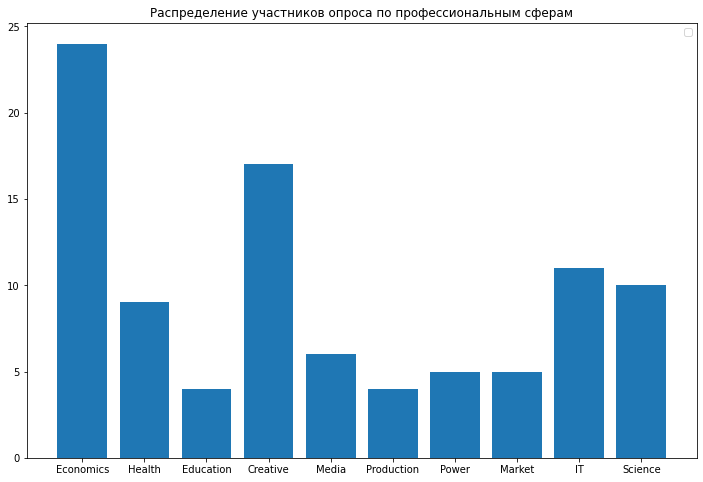

In [84]:
cat_par = ['Economics', 'Health', 'Education', 'Creative', 'Media', 'Production','Power', 'Market', 'IT', 'Science']

g1 = [len(data[data.Result == 'Economics'].index), 
      len(data[data.Result == 'Health'].index), 
      len(data[data.Result == 'Education'].index),
     len(data[data.Result == 'Creative'].index),
     len(data[data.Result == 'Media'].index),
     len(data[data.Result == 'Production'].index),
     len(data[data.Result == 'Power'].index),
     len(data[data.Result == 'Market'].index),
     len(data[data.Result == 'IT'].index),
     len(data[data.Result == 'Science'].index)] 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
x = np.arange(len(cat_par))
rects1 = ax.bar(x, g1, width = 0.8)
ax.set_title('Распределение участников опроса по профессиональным сферам')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()



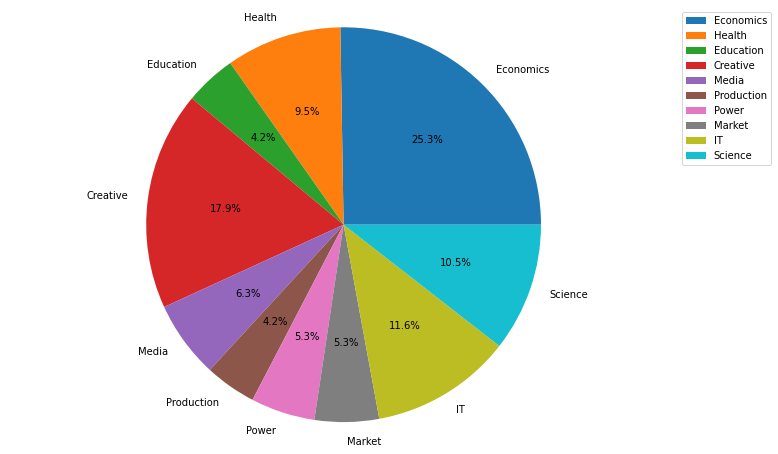

In [85]:
sizes = [len(data[data.Result == 'Economics'].index), 
      len(data[data.Result == 'Health'].index), 
      len(data[data.Result == 'Education'].index),
     len(data[data.Result == 'Creative'].index),
     len(data[data.Result == 'Media'].index),
     len(data[data.Result == 'Production'].index),
     len(data[data.Result == 'Power'].index),
     len(data[data.Result == 'Market'].index),
     len(data[data.Result == 'IT'].index),
     len(data[data.Result == 'Science'].index)]
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot()
wedges, texts, autotexts = ax1.pie(sizes, labels=['Economics', 'Health', 'Education', 'Creative', 'Media', 'Production','Power', 'Market', 'IT', 'Science'], autopct='%1.1f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

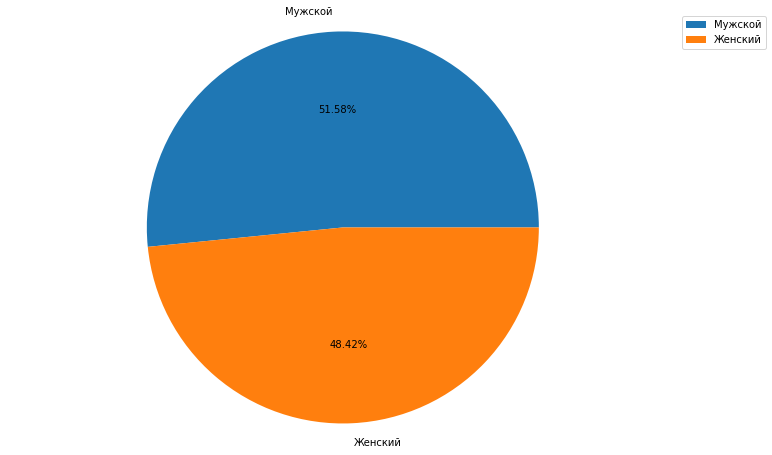

In [86]:
sizes = [len(datam.index), len(dataf.index)]
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot()
wedges, texts, autotexts = ax1.pie(sizes, labels=['Мужской', 'Женский'], autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/1744915420.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g1 = [len(datam[data.Result == 'Economics'].index),
C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/1744915420.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(datam[data.Result == 'Health'].index),
C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/1744915420.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(datam[data.Result == 'Education'].index),
C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/1744915420.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(datam[data.Result == 'Creative'].index),
C:\Users\pashk\AppData\Local\Temp/ipykernel_18260/1744915420.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(datam[data.Result == 'Media'].index),
C:\Users\pashk\AppData\Local\Temp/ipykernel_182

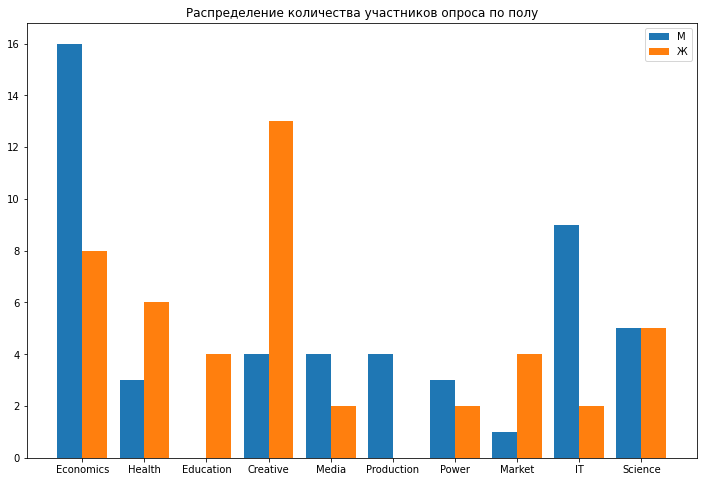

In [87]:
cat_par = ['Economics', 'Health', 'Education', 'Creative', 'Media', 'Production','Power', 'Market', 'IT', 'Science']

g1 = [len(datam[data.Result == 'Economics'].index), 
      len(datam[data.Result == 'Health'].index), 
      len(datam[data.Result == 'Education'].index),
     len(datam[data.Result == 'Creative'].index),
     len(datam[data.Result == 'Media'].index),
     len(datam[data.Result == 'Production'].index),
     len(datam[data.Result == 'Power'].index),
     len(datam[data.Result == 'Market'].index),
     len(datam[data.Result == 'IT'].index),
     len(datam[data.Result == 'Science'].index)] 

g2 = [len(dataf[data.Result == 'Economics'].index), 
      len(dataf[data.Result == 'Health'].index), 
      len(dataf[data.Result == 'Education'].index),
     len(dataf[data.Result == 'Creative'].index),
     len(dataf[data.Result == 'Media'].index),
     len(dataf[data.Result == 'Production'].index),
     len(dataf[data.Result == 'Power'].index),
     len(dataf[data.Result == 'Market'].index),
     len(dataf[data.Result == 'IT'].index),
     len(dataf[data.Result == 'Science'].index)]
width = 0.4
x = np.arange(len(cat_par))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
rects1 = ax.bar(x - width/2, g1, width, label='M')
rects2 = ax.bar(x + width/2, g2, width, label='Ж')
ax.set_title('Распределение количества участников опроса по полу')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()